In [1]:
import os
from tqdm import tqdm
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import tqdm
from random import randint
import json
import cv2

In [2]:
path = '/content/bestteamlead.png'

# Data preparation

In [3]:
def show_img(path):
  print(path)
  cv2_imshow(cv2.imread(path))

def get_shape(path):
  img_matrix = cv2.imread(path)
  return img_matrix.shape, img_matrix.reshape(-1).shape[0]

def get_blocks_params(horiz_compres_factor, vert_compres_factor, img_size):
  horiz_blocks_num = img_size // horiz_compres_factor
  vert_blocks_num = img_size // vert_compres_factor
  return horiz_blocks_num, vert_blocks_num,\
         horiz_blocks_num * vert_blocks_num

def normalize_data(path):
  return np.expand_dims(cv2.imread(path).reshape(-1) / 255, axis=1)

/content/bestteamlead.png


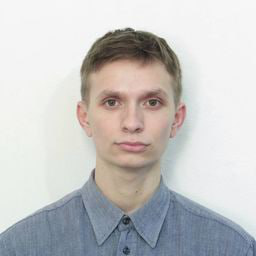

In [4]:
show_img(path)

In [5]:
print('image shape - {}, total number - {}'.format(*get_shape(path)))

image shape - (256, 256, 3), total number - 196608


In [6]:
n, m, size = int(input()),int(input()), get_shape(path)[0][1]
horiz, vert, blocks_num = get_blocks_params(n, m, size)

16
16


In [7]:
data = normalize_data(path)

In [8]:
data.shape

(196608, 1)

In [9]:
class RecyclingNN():
    def __init__(self, n : int = 16, m : int = 16, Z : int = 3, compression_factor : int = 16, alpha : float = 5*10e-5, min : float = 0.0, max : float = 1.) -> None:
        self.alpha = alpha
        self.W1 = np.random.normal(0.0, pow(3*m*n//Z, -0.5),(3*m*n,3*m*n//Z))
        self.W2 = self.W1.T        

    def forward(self, X):
        splitted_pic = []
        #split image into squares
        for j in range(vertical):
                for k in range(horizontal):
                    splitted_pic.append(X[m*j:m*(j+1),n*k:n*(k+1),:].reshape(n*m*3)*2-1)
        encoded_pic = []
        #encode pic
        for i in splitted_pic:
            encoded_pic.append(i@self.W1)
        X = np.array(encoded_pic)

        pic = np.zeros((size,size,3))
        for i in range(vertical):
            for j in range(horizontal):
                pic[i*m:(i+1)*m,j*n:(j+1)*n] = (X[i*m+j]@self.W2).reshape(16,16,3)
        pic = (pic+1)/2
        return pic
        

    def backprop(self, X):
        compressed = (X@self.W1)[np.newaxis]
        output = np.dot(compressed,self.W2)
        error = (output - X)
        self.W2 -=  self.alpha*np.dot(compressed.T,error)
        X = X[np.newaxis]
        self.W1 -= self.alpha*np.dot(np.dot(X.T,error),self.W2.T)
        return np.abs(error).sum()

In [20]:
images_num = 2000
vertical, horizontal = 16, 16
data = np.zeros((blocks_num*images_num, n*m*3))
pic = mpimg.imread(path)
for i in range(images_num):
    pic = mpimg.imread(path)
    for j in range(vertical):
        for k in range(horizontal):
            data[blocks_num*i+horizontal*j+k,:] = pic[m*j:m*(j+1),n*k:n*(k+1),:].reshape(n*m*3)*2-1

In [21]:
nn = RecyclingNN()

In [23]:
train_num = 100000
train = data[:train_num]

In [24]:
errors = []
counter = 0
for image in train:
    errors.append(nn.backprop(image))

KeyboardInterrupt: ignored

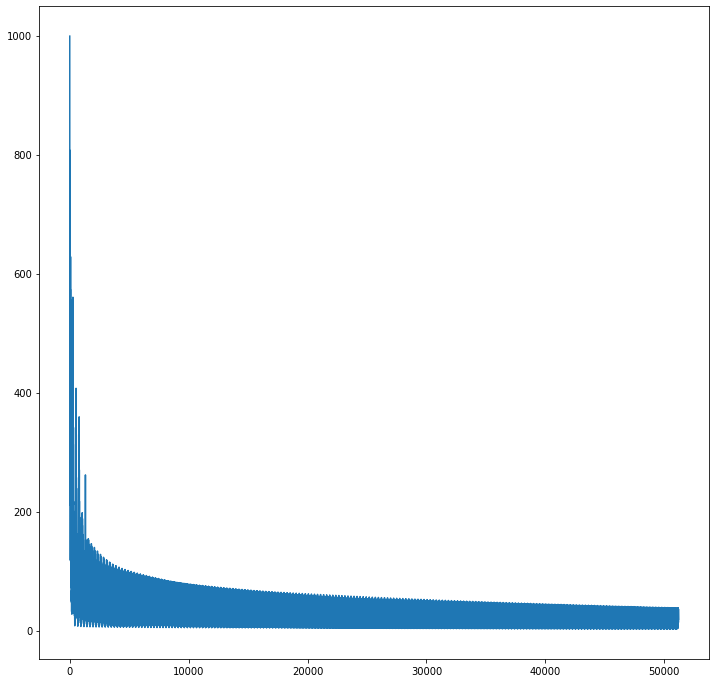

In [25]:
plt.plot(errors)

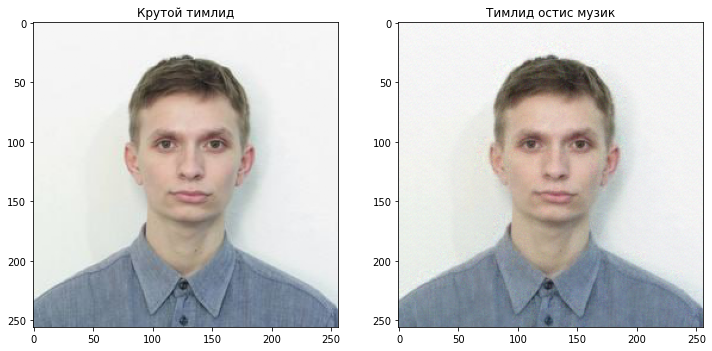

In [27]:
#network testing
matplotlib.rcParams['figure.figsize'] = [12, 12]

pic_num = randint(1,1000)
pic = mpimg.imread('/content/bestteamlead.png')
test = nn.forward(pic)

fig, axs = plt.subplots(1,2)
axs[0].imshow(pic)
axs[1].imshow(test)
axs[0].set_title("Крутой тимлид")
axs[1].set_title("Тимлид остис музик");